In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree

pd.set_option("display.max_columns", None)

# 1 - PREDICT 'Ave Rating' from the 5 'review' columns to right of df below
### *binary classification based on median of 'Ave Rating'

In [2]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('./merged_df.csv')
data.head()

,Unnamed: 0,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1019498330,4.0,4.0,4.0,Suds,Altbier,4.0,4.5,Double Bag,7.2,273
1,1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1113838346,4.5,4.0,4.0,canucklehead,Altbier,4.5,4.0,Double Bag,7.2,273
2,2,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1295820502,3.5,4.0,4.0,ElliotNess,Altbier,3.5,3.0,Double Bag,7.2,273
3,3,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285456364,3.5,3.5,3.0,nerdrocker101,Altbier,3.5,3.5,Double Bag,7.2,273
4,4,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285293842,4.0,3.5,3.5,MaxBrewell,Altbier,3.5,4.0,Double Bag,7.2,273


In [6]:
data.describe()

,Unnamed: 0,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,3.768820e+05,376882.000000,376882.000000,376882.000000,376882.000000,376882.000000,375474.000000,376882.000000
mean,188440.500000,2838.514065,66.039697,6.850764,3.782266,24.182614,44.208031,16.340175,46.601522,17.514869,38.670626,58.734641,34.459852,0.972527,42.626119,43.249341,17.456819,73.943834,2162.572288,1.219980e+09,3.818459,3.696987,3.818547,3.723758,3.778916,6.845114,14185.915812
std,108796.606414,1552.038019,34.524237,2.259144,0.541453,15.233039,23.325786,8.860431,25.017546,15.480519,26.100724,31.272972,32.810484,2.022893,31.312587,30.216149,21.445919,38.437180,4642.713084,7.746292e+07,0.757600,0.776115,0.690383,0.740803,0.790963,2.211825,18457.936413
min,0.000000,3.000000,2.000000,0.000000,1.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.846496e+08,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,5.000000
25%,94220.250000,1529.000000,37.000000,5.000000,3.600000,15.000000,27.000000,10.000000,29.000000,7.000000,18.000000,36.000000,11.000000,0.000000,15.000000,19.000000,4.000000,41.000000,132.000000,1.167705e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.000000,870.000000
50%,188440.500000,2706.000000,63.000000,6.300000,3.890000,20.000000,40.000000,14.000000,41.000000,12.000000,32.000000,55.000000,25.000000,0.000000,37.000000,35.000000,11.000000,68.000000,267.000000,1.234564e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.300000,3128.000000
75%,282660.750000,4276.000000,98.000000,8.100000,4.130000,30.000000,50.000000,21.000000,56.000000,23.000000,56.000000,77.000000,46.000000,1.000000,66.000000,58.000000,23.000000,101.000000,922.000000,1.285470e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.100000,25880.000000
max,376881.000000,5557.000000,126.000000,20.000000,4.760000,65.000000,100.000000,81.000000,175.000000,120.000000,148.000000,219.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,27710.000000,1.326274e+09,5.000000,5.000000,5.000000,5.000000,5.000000,21.920000,77281.000000


In [7]:
# define Binary column ('hi_lo') where greater than or equal to median 
def f(row):

    if row['Ave Rating'] < 3.782:
        val = 0
    else:
        val = 1
    return val

data['hi_lo'] = data.apply(f, axis=1)
data.head(2)

,Unnamed: 0,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,hi_lo
0,0,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1019498330,4.0,4.0,4.0,Suds,Altbier,4.0,4.5,Double Bag,7.2,273,1
1,1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1113838346,4.5,4.0,4.0,canucklehead,Altbier,4.5,4.0,Double Bag,7.2,273,1
2,2,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1295820502,3.5,4.0,4.0,ElliotNess,Altbier,3.5,3.0,Double Bag,7.2,273,1
3,3,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285456364,3.5,3.5,3.0,nerdrocker101,Altbier,3.5,3.5,Double Bag,7.2,273,1
4,4,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285293842,4.0,3.5,3.5,MaxBrewell,Altbier,3.5,4.0,Double Bag,7.2,273,1


In [8]:
# reduce df
X = data[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]

y = data['hi_lo']



In [25]:
feature_names = X.columns
X.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,4.0,4.0,4.0,4.0,4.5
1,4.5,4.0,4.0,4.5,4.0
2,3.5,4.0,4.0,3.5,3.0
3,3.5,3.5,3.0,3.5,3.5
4,4.0,3.5,3.5,3.5,4.0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# Forests
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7809936213795227

# 2 - KNN

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [36]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.714/0.701
k: 3, Train/Test Score: 0.749/0.739
k: 5, Train/Test Score: 0.769/0.759
k: 7, Train/Test Score: 0.770/0.762
k: 9, Train/Test Score: 0.775/0.767
k: 11, Train/Test Score: 0.777/0.770
k: 13, Train/Test Score: 0.777/0.772
k: 15, Train/Test Score: 0.778/0.772
k: 17, Train/Test Score: 0.779/0.773
k: 19, Train/Test Score: 0.781/0.775


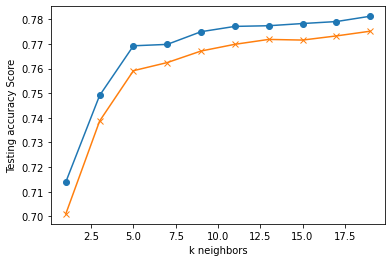

In [37]:
 # Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.770
